In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trips = pd.read_pickle('../cleaned_data/2018-2019_trips')

ind = pd.DatetimeIndex(trips['CheckoutDateTime'])
trips['date'] = ind.date.astype('datetime64')
trips['hour'] = ind.hour

In [3]:
# Count trips by date
by_date = trips.pivot_table('TripId', aggfunc='count',
                            index='date',
                            columns='agg_member_type')

by_date_all = trips.pivot_table('TripId', aggfunc='count',
                            index='date')

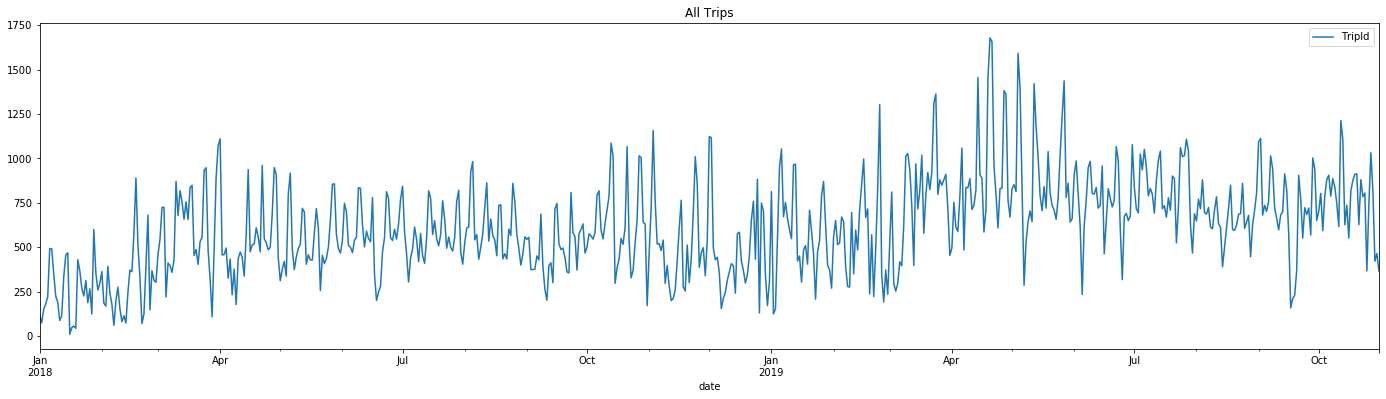

In [4]:
fig, ax = plt.subplots(figsize=(24, 6))
by_date_all.plot(ax=ax)
plt.title('All Trips');

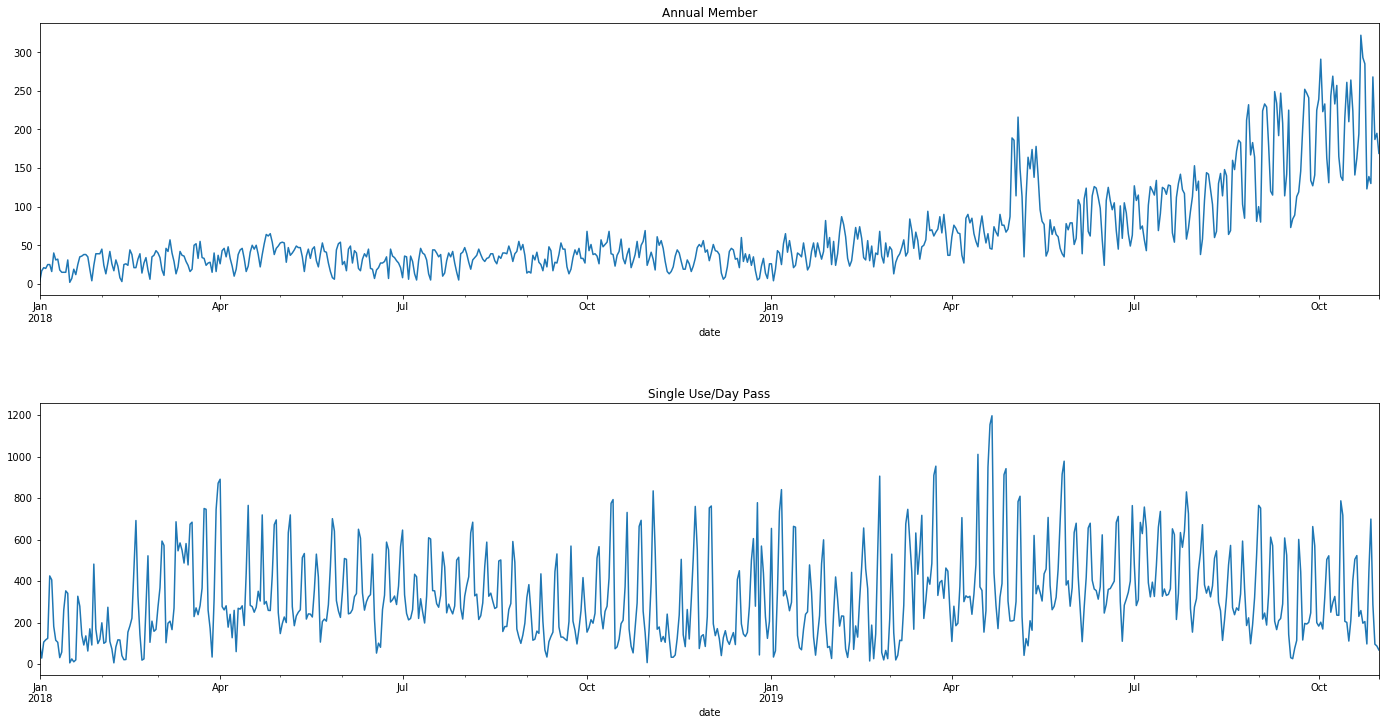

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, figsize=(24, 12))
fig.subplots_adjust(hspace=0.4)
by_date.loc[:, 'Annual'].plot(ax=ax[0], title='Annual Member');
by_date.loc[:, 'Single/Day'].plot(ax=ax[1], title='Single Use/Day Pass');

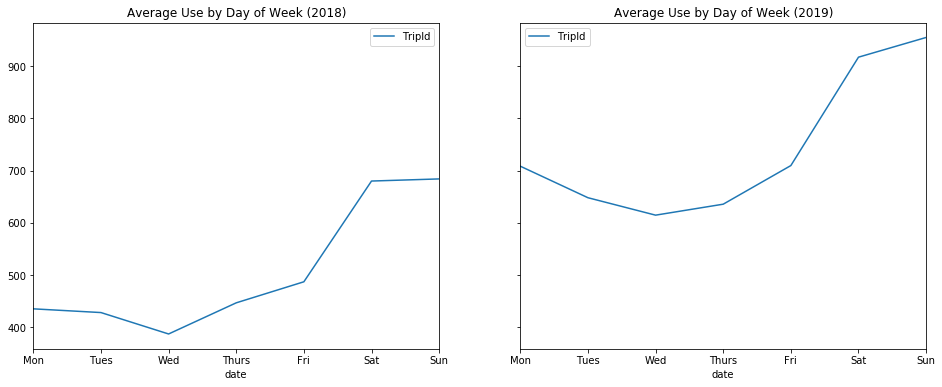

In [6]:
by_weekday = by_date_all.groupby([by_date_all.index.year,
                              by_date_all.index.dayofweek]).mean()

by_weekday.columns.name = None  # remove label for plot

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
by_weekday.loc[2018].plot(title='Average Use by Day of Week (2018)', ax=ax[0]);
by_weekday.loc[2019].plot(title='Average Use by Day of Week (2019)', ax=ax[1]);
for axi in ax:
    axi.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])

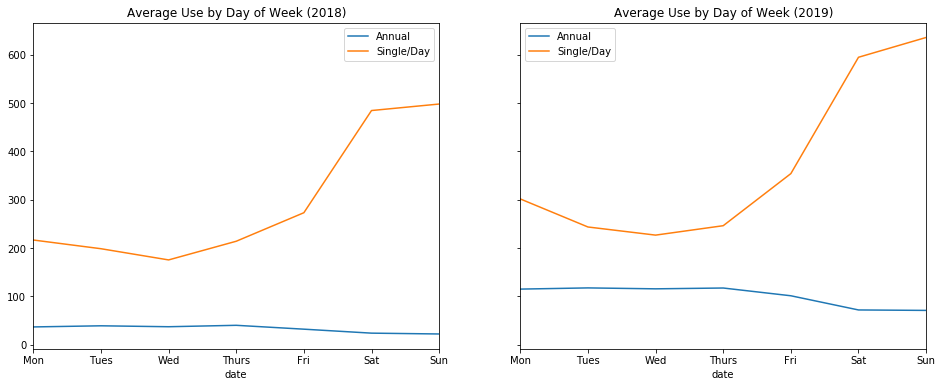

In [7]:
by_weekday = by_date.groupby([by_date.index.year,
                              by_date.index.dayofweek]).mean()
by_weekday.columns.name = None  # remove label for plot

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
by_weekday.loc[2018].plot(title='Average Use by Day of Week (2018)', ax=ax[0]);
by_weekday.loc[2019].plot(title='Average Use by Day of Week (2019)', ax=ax[1]);
for axi in ax:
    axi.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])